@Author: Bhupinder Singh

@Date: 29-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 31-01-2023

@Title: The data given in the url is related with direct marketing campaigns of a banking
        institution. The marketing campaigns were based on phone calls. Often, more
        than one contact to the same client was required, in order to access if the product
        (bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
        predict whether client will subscribe to term deposit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import auc
from sklearn import preprocessing

### Import the dataset 

In [2]:
data = pd.read_csv('bank.csv', sep=';')

### Getting Insights of dataset

In [3]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Checking for Null values in data set

In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Checking for Outliers in data set

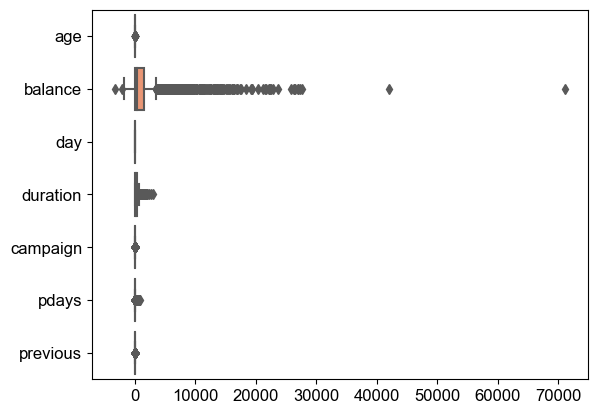

In [7]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

### Removing Outliers

In [8]:
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.5,0.80]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

data=cap_data(data)

capping the  age
capping the  job
capping the  marital
capping the  education
capping the  default
capping the  balance
capping the  housing
capping the  loan
capping the  contact
capping the  day
capping the  month
capping the  duration
capping the  campaign
capping the  pdays
capping the  previous
capping the  poutcome
capping the  y


C:\Users\Asus\AppData\Local\Temp\ipykernel_15300\828903004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] <= percentiles[0]] = percentiles[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_15300\828903004.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][data[col] >= percentiles[1]] = percentiles[1]


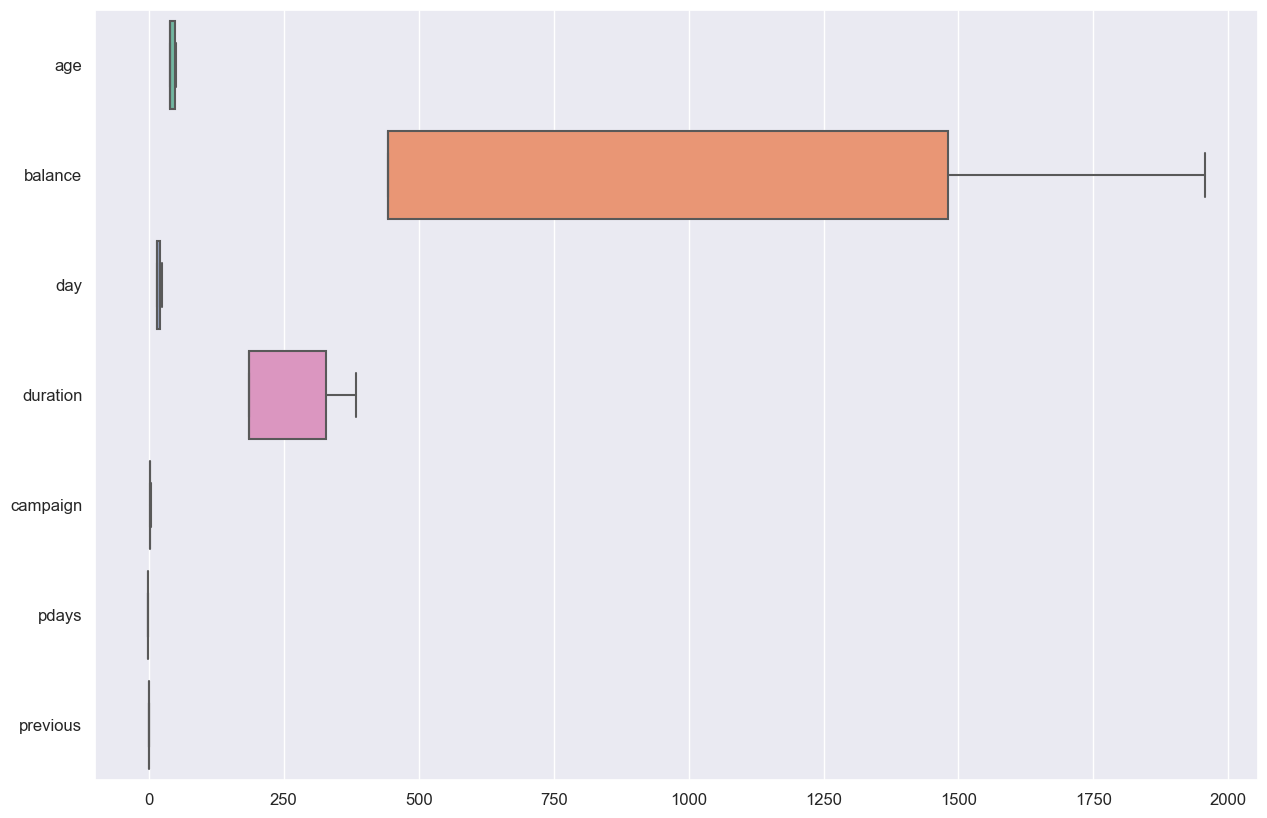

In [9]:
#create the plot
ax = sns.boxplot(data = data[['age','balance','day','duration','campaign','pdays','previous']], orient = "h", palette = "Set2")
ax.tick_params(which = "both", labelsize = 12)
sns.set(rc={'figure.figsize':(15,10)})

Data encoding

In [10]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,unemployed,married,primary,no,1787,no,no,cellular,19,oct,185,2,-1,0,unknown,no
1,39,services,married,secondary,no,1957,yes,yes,cellular,16,may,220,2,-1,0,failure,no
2,39,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,2,-1,0,failure,no
3,39,management,married,tertiary,no,1476,yes,yes,unknown,16,jun,199,4,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,444,yes,no,unknown,16,may,226,2,-1,0,unknown,no


In [12]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,unemployed,married,primary,no,1787,no,no,cellular,19,oct,185,2,-1,0,unknown,no
1,39,services,married,secondary,no,1957,yes,yes,cellular,16,may,220,2,-1,0,failure,no
2,39,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,2,-1,0,failure,no
3,39,management,married,tertiary,no,1476,yes,yes,unknown,16,jun,199,4,-1,0,unknown,no
4,51,blue-collar,married,secondary,no,444,yes,no,unknown,16,may,226,2,-1,0,unknown,no


In [13]:
data[ 'job' ] = data[ 'job' ].astype( 'category' )  
data[ 'education' ] = data[ 'education' ].astype( 'category' ) 
data[ 'poutcome' ] = data[ 'poutcome' ].astype( 'category' ) 
data['month'] = data['month'].astype( 'category' ) 
data['marital'] = data['marital'].astype( 'category' ) 
data['contact'] = data['contact'].astype( 'category' ) 


data['job'] = data['job'].cat.codes
data['education'] = data['education'].cat.codes
data['poutcome'] = data['poutcome'].cat.codes
data['month'] = data['month'].cat.codes
data['marital'] = data['marital'].cat.codes
data['contact'] = data['contact'].cat.codes

binary encoding

In [14]:
def binary_encode(data_frame,col_name):
    """
    Description:
        Function to binary encode the categorical columns in data frame 
    Parameter:
        data_frame: Imported dataframe
        col_name: column name that need to be encoded
    Return:
            Returns encoded_list
    """
    encoded_list = []
    for i in data_frame[col_name]:
        if ((i == 'Yes') | (i== 'yes')):
            encoded_value = 1
        else:
            encoded_value = 0
        encoded_list.append(encoded_value)
    return encoded_list

In [15]:
row,col=data.shape
default_list = binary_encode(data,'default')
data.drop(['default'],axis=1,inplace=True)
data.insert(loc=2, column="default", value=default_list)

loan_list = binary_encode(data,'loan')
data.drop(['loan'],axis=1,inplace=True)
data.insert(loc=2, column="loan", value=loan_list)

housing_list = binary_encode(data,'housing')
data.drop(['housing'],axis=1,inplace=True)
data.insert(loc=2, column="housing", value=housing_list)

y_list = binary_encode(data,'y')
data.drop(['y'],axis=1,inplace=True)
data.insert(loc=col-1, column="y", value=y_list)

In [16]:
data.head(5)

,age,job,housing,loan,default,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,39,10,0,0,0,1,0,1787,0,19,10,185,2,-1,0,3,0
1,39,7,1,1,0,1,1,1957,0,16,8,220,2,-1,0,0,0
2,39,4,1,0,0,2,2,1350,0,16,0,185,2,-1,0,0,0
3,39,4,1,1,0,1,2,1476,2,16,6,199,4,-1,0,3,0
4,51,1,1,0,0,1,1,444,2,16,8,226,2,-1,0,3,0


### Feature Scaling

In [17]:
df = data[list(data.columns[:-1])]
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(df)
df = pd.DataFrame(standard_df)
df['y'] = data['y']
data=df

In [18]:
data.columns =['age','job',	'housing','loan','default','marital','education','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','y']

###  Split the dataset into training set and test set

In [19]:
# Select ratio
ratio = 0.80
  
total_rows = data.shape[0]
train_size = int(total_rows*ratio)
  
# Split data into test and train
train_data = data[0:train_size]
test_data = data[train_size:]


# print train set
print("Train dataframe")
display(train_data)
  
# print test set
print("Test dataframe")
display(test_data)

train_data.shape, test_data.shape

Train dataframe


,age,job,housing,loan,default,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.821381,1.716804,-1.142051,-0.424756,-0.130759,-0.246429,-1.644755,1.416776,-0.723642,0.115042,1.485414,-0.775794,-0.670145,0.0,0.0,0.444413,0
1,-0.821381,0.795246,0.875617,2.354292,-0.130759,-0.246429,-0.309038,1.691978,-0.723642,-0.806589,0.819288,-0.344756,-0.670145,0.0,0.0,-2.579961,0
2,-0.821381,-0.126313,0.875617,-0.424756,-0.130759,1.421396,1.026680,0.709343,-0.723642,-0.806589,-1.845220,-0.775794,-0.670145,0.0,0.0,-2.579961,0
3,-0.821381,-0.126313,0.875617,2.354292,-0.130759,-0.246429,1.026680,0.913317,1.495133,-0.806589,0.153161,-0.603379,1.765325,0.0,0.0,0.444413,0
4,1.578272,-1.047871,0.875617,-0.424756,-0.130759,-0.246429,-0.309038,-0.757325,1.495133,-0.806589,0.819288,-0.270864,-0.670145,0.0,0.0,0.444413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3611,-0.821381,1.409618,0.875617,-0.424756,-0.130759,1.421396,-0.309038,-0.757325,-0.723642,-0.806589,0.819288,-0.775794,1.765325,0.0,0.0,0.444413,0
3612,1.378301,-0.126313,-1.142051,-0.424756,-0.130759,-1.914255,1.026680,-0.757325,-0.723642,-0.806589,0.819288,-0.615694,-0.670145,0.0,0.0,-1.571836,0
3613,1.178330,1.409618,-1.142051,-0.424756,-0.130759,-0.246429,-0.309038,1.691978,1.495133,0.115042,0.819288,-0.775794,-0.670145,0.0,0.0,0.444413,0
3614,1.578272,0.180874,-1.142051,-0.424756,-0.130759,-1.914255,1.026680,-0.757325,-0.723642,-0.806589,-1.512157,1.662646,-0.670145,0.0,0.0,0.444413,0


Test dataframe


,age,job,housing,loan,default,marital,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3616,0.378445,-0.126313,-1.142051,-0.424756,-0.130759,1.421396,1.026680,-0.757325,-0.723642,1.651094,-0.179903,-0.775794,-0.670145,0.0,0.0,0.444413,0
3617,-0.221468,-1.047871,-1.142051,-0.424756,-0.130759,-0.246429,-0.309038,-0.757325,-0.723642,-0.806589,-0.179903,-0.775794,-0.670145,0.0,0.0,0.444413,0
3618,0.378445,-1.355057,-1.142051,-0.424756,-0.130759,-0.246429,-0.309038,-0.757325,-0.723642,-0.806589,-0.179903,-0.443279,-0.670145,0.0,0.0,0.444413,0
3619,0.778388,1.409618,0.875617,-0.424756,-0.130759,-0.246429,-1.644755,-0.757325,1.495133,-0.806589,0.819288,-0.775794,1.765325,0.0,0.0,0.444413,0
3620,1.578272,0.180874,-1.142051,2.354292,-0.130759,-1.914255,-0.309038,-0.508024,-0.723642,-0.806589,-0.179903,-0.775794,-0.670145,0.0,0.0,0.444413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.821381,0.795246,0.875617,-0.424756,-0.130759,-0.246429,-0.309038,-0.757325,-0.723642,1.651094,-0.179903,0.997617,1.765325,0.0,0.0,0.444413,0
4517,1.578272,0.488060,0.875617,2.354292,7.647669,-0.246429,1.026680,-0.757325,1.495133,-0.806589,0.819288,-0.775794,-0.670145,0.0,0.0,0.444413,0
4518,1.578272,1.409618,-1.142051,-0.424756,-0.130759,-0.246429,-0.309038,-0.757325,-0.723642,0.115042,-1.512157,-0.775794,1.765325,0.0,0.0,0.444413,0
4519,-0.821381,-1.047871,-1.142051,-0.424756,-0.130759,-0.246429,-0.309038,0.364531,-0.723642,-0.806589,-0.846030,-0.775794,1.765325,0.0,0.0,-1.571836,0


((3616, 17), (905, 17))

### Extracting the values of features

In [20]:
rows,col=train_data.shape
data_n=train_data.values
m=len(data_n[:,-1])
print(m)
x_train=data_n[:,0:col-1].reshape(m,col-1)
x_train = np.append(np.ones((m,1)),x_train,axis=1)
y_train=data_n[:,-1].reshape(m,1)
#theta=np.zeros((col,1))

3616


In [23]:
class MultilayerNeuralNetwork(object):
    """A Multilayer Perceptron class.
    """

    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        """
        Description:
            Constructor for the MultiLayerNeuralNetwork. Takes the number of inputs,
            a variable number of hidden layers, and number of outputs
        Parameter:
            num_inputs (int): Number of inputs
            hidden_layers (list): A list of ints for the hidden layers
            num_outputs (int): Number of outputs
        Return:
                None
        """

        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs

        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]

        # create random connection weights for the layers
        weights = []
        for i in range(len(layers) - 1):
            w = np.random.rand(layers[i], layers[i + 1])
            weights.append(w)
        self.weights = weights

        # save derivatives per layer
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives

        # save activations per layer
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations


    def forward_propagate(self, inputs):
        """
        Description:
            Computes forward propagation of the network based on input.
        Parameter:
            inputs : Input x features
        Return:
            activations : Output values
        """

        # the input layer activation is just the input itself
        activations = inputs

        # save the activations for backpropogation
        self.activations[0] = activations

        # iterate through the network layers
        for i, w in enumerate(self.weights):
            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)

            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)

            # save the activations for backpropogation
            self.activations[i + 1] = activations

        # return output layer activation
        return activations


    def back_propagate(self, error):
        """
        Description: 
            Backpropogates an error values.
        Parameters:
            error: The error to backprop.
        Return:
            error: The final error of the input
        """

        # iterate backwards through the network layers
        for i in reversed(range(len(self.derivatives))):

            # get activation for previous layer
            activations = self.activations[i+1]

            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)

            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T

            # get activations for current layer
            current_activations = self.activations[i]

            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)

            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)

            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)


    def train(self, inputs, targets, epochs, learning_rate):
        """
        Description:
            Trains model running forward prop and backprop
        Parameters:
            inputs (ndarray): X
            targets (ndarray): Y
            epochs (int): Num. epochs we want to train the network for
            learning_rate (float): Step to apply to gradient descent
        Return:
            None    
        """
        # now enter the training loop
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, input in enumerate(inputs):
                target = targets[j]

                # activate the network!
                output = self.forward_propagate(input)

                error = target - output

                self.back_propagate(error)

                # now perform gradient descent on the derivatives
                # (this will update the weights
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self._mse(target, output)

            # Epoch complete, report the training error
            print("Error: {} at epoch {}".format(sum_errors / len(y_train), i+1))

        print("Training complet")


    def gradient_descent(self, learningRate=1):
        """
        Description:
            Learns by descending the gradient
        Parameters:
            learningRate (float): How fast to learn.
        Return:
            None    
        """
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate


    def _sigmoid(self, x):
        """
        Description:
            Sigmoid activation function
        Parameters:
            x : Value to be processed
        Returns:
            y : converted sigmoid value
        """

        y = 1.0 / (1 + np.exp(-x))
        return y


    def _sigmoid_derivative(self, x):
        """
        Description:
            Sigmoid derivative function
        Parameters:
            x : Value to be processed
        Returns:
            y : converted sigmoid value
        """
        return x * (1.0 - x)


    def _mse(self, target, output):
        """
        Description:
            Mean Squared Error loss function
        Parameters:
            target : The ground truth
            output : The predicted values
        Returns:
            Mean Square Error
        """
        return np.average((target - output) ** 2)


if __name__ == "__main__":

    mlnn = MultilayerNeuralNetwork(17, [17,17], 1)

    # train network
    mlnn.train(x_train, y_train, 500, 0.1)

Error: 0.8855878149288133 at epoch 1
Error: 0.18710099500597419 at epoch 2
Error: 0.10216150411004098 at epoch 3
Error: 0.10208079092690643 at epoch 4
Error: 0.10200379716697988 at epoch 5
Error: 0.10192986986567136 at epoch 6
Error: 0.1018583614262132 at epoch 7
Error: 0.10178859923139164 at epoch 8
Error: 0.10171985060809918 at epoch 9
Error: 0.1016512782694328 at epoch 10
Error: 0.10158187922789114 at epoch 11
Error: 0.10151039598776242 at epoch 12
Error: 0.10143518057245038 at epoch 13
Error: 0.10135397504827391 at epoch 14
Error: 0.10126353557989078 at epoch 15
Error: 0.10115894136332895 at epoch 16
Error: 0.10103220856688906 at epoch 17
Error: 0.1008691808248965 at epoch 18
Error: 0.10064141844398737 at epoch 19
Error: 0.10027997821403581 at epoch 20
Error: 0.09955823024573805 at epoch 21
Error: 0.09735005486744279 at epoch 22
Error: 0.0918918330179675 at epoch 23
Error: 0.08775537954322822 at epoch 24
Error: 0.08599099148494957 at epoch 25
Error: 0.08528324317643865 at epoch 26


### Accuracy

In [24]:
rows,col=test_data.shape
data_x=test_data.values
m2=len(data_x[:,-1])
x_test=data_x[:,0:col-1].reshape(m2,col-1)
x_test = np.append(np.ones((m2,1)),x_test,axis=1)
y_test=data_x[:,-1].reshape(m2,1)

In [33]:
y_pred = mlnn.forward_propagate(x_test)

In [34]:
for i in range(0,len(y_pred)):
    if(y_pred[i]>0.5):
        y_pred[i]=1
    else:
        y_pred[i]=0

In [35]:
def EvaluateTest(y_test, y_pred):
    """
    Description:
        Function to evaluate the accuracy of the model
    Parameter:
        y_test : y value of dataset
        y_pred : pred  of test row
    Return: 
        return the accuracy
    """
    n_correct = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_test)
    return acc

In [36]:
EvaluateTest(y_test, y_pred)

0.8464088397790055